In [1]:
import pandas as pd
import numpy as np
import os

In [2]:


def get_data(comb_stock_codes):
    
    raw_data_list = []
    for r,d,fs in os.walk('../data/csmar_close'):
        for f in fs:
            if (not ('[DES]' in f)) and ('txt' in f):
                file_path = os.path.join(r,f)
                #print(file_path)
                raw_data_list.append(pd.read_csv(file_path,
                            sep='\t',
                            dtype={'Stkcd': str})[['Trddt','Stkcd','Adjprcwd']])
    working_data  =  pd.concat(raw_data_list,axis=0).set_index(['Trddt','Stkcd'])
    workding_df = working_data.unstack('Stkcd')
    df = workding_df.T.dropna().T
    df.columns = df.columns.get_level_values(1)

    return df[comb_stock_codes]


In [3]:
comb_stock_codes = ['000001','002330','000607','000021','600448',
                    '688233','000901','600722','900948','601208']

In [4]:

price_df = get_data(comb_stock_codes)
price_df.index = pd.to_datetime(price_df.index)

In [6]:
price_df

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Trddt,,,,,,,,,,
2020-09-16,1646.285839,14.443544,15.971281,307.211266,9.074784,49.345117,73.493217,24.226573,10.962363,20.081550
2020-09-17,1660.147054,14.156722,15.933163,311.504821,9.052917,51.380277,72.841103,23.990791,11.029824,20.444197
2020-09-18,1713.459419,14.279646,16.047516,317.130859,9.031050,51.129642,74.145330,24.226573,11.653835,20.897505
2020-09-21,1691.068226,14.218184,16.199986,319.647771,9.140385,50.026846,75.906037,24.226573,11.485183,20.670851
2020-09-22,1660.147054,13.951849,15.818810,318.611396,9.009183,47.460338,73.362793,23.696064,11.299666,20.104216
...,...,...,...,...,...,...,...,...,...,...
2025-09-09,1483.463745,10.015122,18.618745,310.673487,7.609705,32.888059,104.557045,41.497578,52.539134,51.960229
2025-09-10,1485.988790,10.200587,18.541808,307.098955,7.850242,32.735328,105.277676,43.265941,52.198311,56.062352
2025-09-11,1496.088969,10.283016,18.310997,322.795815,7.784641,34.354276,107.308546,42.735432,52.119660,61.656157


In [7]:
return_df = np.log(price_df.shift(-1)/price_df)

In [8]:
return_df

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Trddt,,,,,,,,,,
2020-09-16,0.008384,-0.020058,-0.002390,0.013879,-0.002413,0.040416,-0.008913,-0.009780,0.006135,0.017898
2020-09-17,0.031608,0.008646,0.007151,0.017900,-0.002418,-0.004890,0.017747,0.009780,0.055032,0.021931
2020-09-18,-0.013154,-0.004313,0.009456,0.007905,0.012034,-0.021805,0.023469,0.000000,-0.014578,-0.010905
2020-09-21,-0.018454,-0.018910,-0.023811,-0.003248,-0.014458,-0.052665,-0.034079,-0.022141,-0.016285,-0.027795
2020-09-22,0.003846,0.005857,0.000000,0.026142,0.019231,0.019455,0.003549,0.002484,0.010394,-0.002257
...,...,...,...,...,...,...,...,...,...,...
2025-09-09,0.001701,0.018349,-0.004141,-0.011572,0.031120,-0.004655,0.006869,0.041731,-0.006508,0.075986
2025-09-10,0.006774,0.008048,-0.012526,0.049850,-0.008392,0.048272,0.019107,-0.012337,-0.001508,0.095109
2025-09-11,-0.011031,-0.008048,0.008368,0.048400,-0.014145,0.032656,-0.005510,0.006873,-0.014185,0.033700


In [9]:
return_df.cov()

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Stkcd,,,,,,,,,,
000001,0.000339,0.000089,0.000074,0.000070,0.000052,0.000049,0.000065,0.000105,0.000088,0.000068
002330,0.000089,0.000646,0.000283,0.000172,0.000239,0.000212,0.000186,0.000220,0.000082,0.000156
000607,0.000074,0.000283,0.000870,0.000264,0.000291,0.000318,0.000251,0.000252,0.000084,0.000184
000021,0.000070,0.000172,0.000264,0.000751,0.000154,0.000501,0.000287,0.000181,0.000075,0.000313
600448,0.000052,0.000239,0.000291,0.000154,0.000643,0.000249,0.000167,0.000255,0.000080,0.000160
688233,0.000049,0.000212,0.000318,0.000501,0.000249,0.001436,0.000345,0.000268,0.000072,0.000441
000901,0.000065,0.000186,0.000251,0.000287,0.000167,0.000345,0.000639,0.000250,0.000106,0.000269
600722,0.000105,0.000220,0.000252,0.000181,0.000255,0.000268,0.000250,0.000896,0.000171,0.000202
900948,0.000088,0.000082,0.000084,0.000075,0.000080,0.000072,0.000106,0.000171,0.000444,0.000113


In [10]:
return_df.mean()

Stkcd
000001   -0.000093
002330   -0.000208
000607    0.000095
000021    0.000084
600448   -0.000122
688233   -0.000279
000901    0.000299
600722    0.000450
900948    0.001279
601208    0.000992
dtype: float64

(a)若假设X_t服从正态，记上述方差协方差矩阵为$\Sigma$,均值$\mu$,联合分布为$N(\mu,\Sigma)$

(b) 给出组合 $b = (1/10，1/10，1/10，...,1/10)^{'}$
由
则$W_t \sim N(-V_tb^{'}\mu,{V_t}^2b^{'}\Sigma b)$

(c)随机模拟结果如下

In [10]:
b = np.array([1/10 for i in range(10)])
loss_df = ((price_df.shift(-1)-price_df)*b).sum(axis=1)
sim_rounds =  1000
sim_list = []
for i in range(sim_rounds):


    idx = np.random.randint(len(loss_df))

    sim_list.append(loss_df.iloc[idx])
    

In [11]:
sim_df = pd.Series(sim_list)

In [12]:
print(f'估计均值为{sim_df.mean():.5f}')
print(f'估计方差为{sim_df.var():.5f}')

估计均值为0.12623
估计方差为14.11890


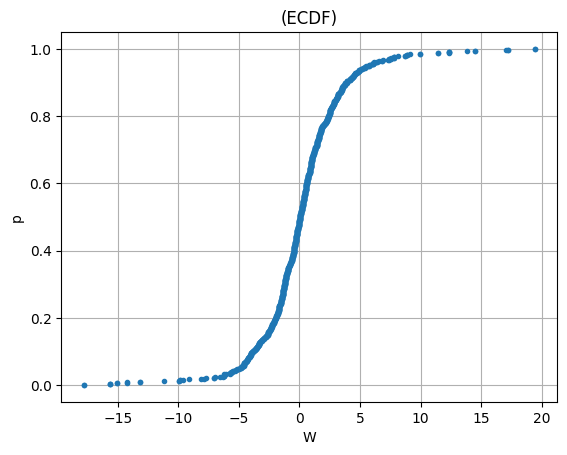

In [13]:
import matplotlib.pyplot as plt

w_values = sim_df.sort_values()
# 计算累积概率
cumulative_prob = np.arange(1, len(w_values) + 1) / len(w_values)

# 绘制经验分布图
plt.plot(w_values, cumulative_prob, marker='.', linestyle='none')
plt.title('(ECDF)')
plt.xlabel('W')
plt.ylabel('p')
plt.grid(True)
plt.show()

若改为月度的，重采样后得到结果

In [14]:
month_price_df = price_df.resample('M').last()

/var/folders/qb/_zmdxt6n29n5h6hxbt7v0v0c0000gn/T/ipykernel_9360/2731593369.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_price_df = price_df.resample('M').last()


In [15]:
month_price_df

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Trddt,,,,,,,,,,
2020-09-30,1617.497162,13.869900,15.285163,305.582676,8.549977,45.916424,70.558704,22.163483,11.586373,20.376200
2020-10-31,1892.588966,13.624052,15.018341,313.725626,8.703046,45.034186,63.972355,20.689846,10.557598,22.098770
2020-11-30,2104.772177,14.423057,16.276224,304.546303,8.593710,44.803602,68.145885,25.287591,8.567507,26.155877
2020-12-31,2062.122283,13.746977,15.018345,281.449936,8.025169,43.831137,65.537427,27.409627,9.444494,23.662683
2021-01-31,2461.965023,12.087507,14.217875,306.174891,6.997423,43.921366,60.124881,21.220356,8.972269,24.818617
...,...,...,...,...,...,...,...,...,...,...
2025-05-31,1415.602597,9.355690,15.079645,265.645520,7.872105,26.654952,77.435103,29.590603,49.949876,27.632286
2025-06-30,1523.864458,9.438120,17.580096,291.246683,7.631571,32.348407,81.431334,37.548236,51.936143,29.460705
2025-07-31,1544.064815,9.685407,18.003250,288.760050,7.237966,32.765872,86.017167,34.954637,53.876210,54.477441


In [16]:
month_return_df = np.log(month_price_df.shift(-1)/month_price_df)

In [17]:
#协方差矩阵为
month_return_df.cov()

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Stkcd,,,,,,,,,,
000001,0.007001,0.001637,0.001573,0.000386,0.001033,-0.000957,0.000277,-0.000380,0.000404,0.001978
002330,0.001637,0.009440,0.004554,-0.000041,0.003944,0.002521,0.001600,0.003310,-0.001604,0.001680
000607,0.001573,0.004554,0.008369,0.003209,0.003935,0.005032,0.002684,0.005499,-0.001139,0.003306
000021,0.000386,-0.000041,0.003209,0.013858,0.000975,0.009923,0.006311,0.002870,-0.002047,0.005333
600448,0.001033,0.003944,0.003935,0.000975,0.007956,0.003732,0.003701,0.005046,0.000311,0.002721
688233,-0.000957,0.002521,0.005032,0.009923,0.003732,0.025177,0.009116,0.005516,-0.002894,0.009977
000901,0.000277,0.001600,0.002684,0.006311,0.003701,0.009116,0.011745,0.004285,-0.000258,0.006277
600722,-0.000380,0.003310,0.005499,0.002870,0.005046,0.005516,0.004285,0.016535,-0.001760,0.004205
900948,0.000404,-0.001604,-0.001139,-0.002047,0.000311,-0.002894,-0.000258,-0.001760,0.009796,-0.001534


In [18]:
#均值向量为
month_return_df.mean()

Stkcd
000001   -0.001584
002330   -0.003517
000607    0.002656
000021    0.001781
600448   -0.001470
688233   -0.004440
000901    0.006711
600722    0.010571
900948    0.024885
601208    0.019777
dtype: float64

In [19]:
#随机模拟结果如下
b = np.array([1/10 for i in range(10)])
month_loss_df = ((month_price_df.shift(-1)-month_price_df)*b).sum(axis=1)
sim_rounds =  5000
sim_list = []
for i in range(sim_rounds):


    idx = np.random.randint(len(month_loss_df))

    sim_list.append(month_loss_df.iloc[idx])
    

In [20]:
month_sim_df = pd.Series(sim_list)

In [21]:
print(f'月度估计均值为{month_sim_df.mean():.5f}')
print(f'月度估计方差为{month_sim_df.var():.5f}')

月度估计均值为-0.47998
月度估计方差为213.97543


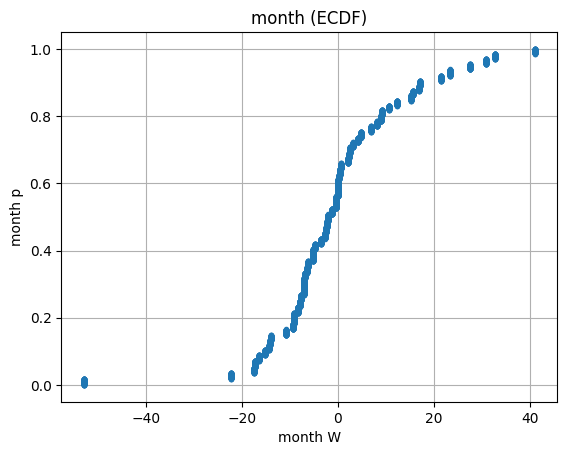

In [25]:
import matplotlib.pyplot as plt

w_values = month_sim_df.sort_values()
# 计算累积概率
cumulative_prob = np.arange(1, len(w_values) + 1) / len(w_values)

# 绘制经验分布图
plt.plot(w_values, cumulative_prob, marker='.', linestyle='none')
plt.title('month (ECDF)')
plt.xlabel('month W')
plt.ylabel('month p')
plt.grid(True)
plt.show()